In [1]:
import os
import re
import itertools
import warnings
from joblib import dump

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats, signal
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

warnings.filterwarnings("ignore")
random_state = 42
activities = ["hair", "listen", "sidepump", "dab", "wipetable", "gun", "elbowkick", "pointhigh", "logout"]
n_labels = len(activities)

In [2]:
!gdown --id 1a00QJq_Ef0_1IrwpS0qSziQToNSKtzJa
!gdown --id 1liyoFvrYWctHaFq4fOycpQb1ZPZ7ym5T
!gdown --id 1igngcglMYqzer2h4QUvG_zYrs7oNX2fQ
!gdown --id 1vfMfmxI8f-bt35HJT7g6tX5hsw94xmIU
!gdown --id 1JaIinT3NeOn-s3mBrwRXSZnFkHCFOr1y
!gdown --id 1vdbfpMzim9FMVnaD7vNDMDAxIv9aragI
!gdown --id 15J_Rlzpe6XdRjRtvDOvWr7iAWH9WmgOd
!unzip -q brandon.zip
!unzip -q brandon2.zip
!unzip -q brandon3.zip
!unzip -q imran.zip
!unzip -q riyas.zip
!unzip -q zenghao.zip
!unzip -q tingwei.zip

Downloading...
From: https://drive.google.com/uc?id=1a00QJq_Ef0_1IrwpS0qSziQToNSKtzJa
To: /content/brandon.zip
100% 989k/989k [00:00<00:00, 31.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1liyoFvrYWctHaFq4fOycpQb1ZPZ7ym5T
To: /content/brandon2.zip
100% 987k/987k [00:00<00:00, 31.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1igngcglMYqzer2h4QUvG_zYrs7oNX2fQ
To: /content/brandon3.zip
100% 985k/985k [00:00<00:00, 31.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vfMfmxI8f-bt35HJT7g6tX5hsw94xmIU
To: /content/imran.zip
100% 941k/941k [00:00<00:00, 14.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JaIinT3NeOn-s3mBrwRXSZnFkHCFOr1y
To: /content/riyas.zip
100% 1.13M/1.13M [00:00<00:00, 17.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vdbfpMzim9FMVnaD7vNDMDAxIv9aragI
To: /content/zenghao.zip
100% 984k/984k [00:00<00:00, 15.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=15J_Rlzpe6XdRjRtvDOvWr7iAWH9WmgOd
To: /content/t

In [3]:
dfs = []

def load_data(activity, label, trials, subject):
    for trial in trials:
        df = pd.read_csv(os.path.join(subject, activity+str(trial)+".csv"), sep=",", index_col=0)
        df = df[40:-40]
        df["activity"] = [label for _ in range(len(df))]
        df["activityName"] = [activity for _ in range(len(df))]
        df["trial"] = [trial for _ in range(len(df))]
        df["subject"] = [subject for _ in range(len(df))]
        dfs.append(df)

ids = [1, 2]
user = "brandon"
load_data("hair", 0, ids, user)
load_data("listen", 1, ids, user)
load_data("sidepump", 2, ids, user)
load_data("dab", 3, ids, user)
load_data("wipetable", 4, ids, user)
load_data("gun", 5, ids, user)
load_data("elbowkick", 6, ids, user)
load_data("pointhigh", 7, ids, user)
load_data("logout", 8, ids, user)

user = "imran"
load_data("hair", 0, ids, user)
load_data("listen", 1, ids, user)
load_data("sidepump", 2, ids, user)
load_data("dab", 3, ids, user)
load_data("wipetable", 4, ids, user)
load_data("gun", 5, ids, user)
load_data("elbowkick", 6, ids, user)
load_data("pointhigh", 7, ids, user)
load_data("logout", 8, ids, user)

user = "riyas"
load_data("hair", 0, ids, user)
load_data("listen", 1, ids, user)
load_data("sidepump", 2, ids, user)
load_data("dab", 3, ids, user)
load_data("wipetable", 4, ids, user)
load_data("gun", 5, ids, user)
load_data("elbowkick", 6, ids, user)
load_data("pointhigh", 7, ids, user)
load_data("logout", 8, ids, user)

user = "tingwei"
load_data("hair", 0, ids, user)
load_data("listen", 1, ids, user)
load_data("sidepump", 2, ids, user)
load_data("dab", 3, ids, user)
load_data("wipetable", 4, ids, user)
load_data("gun", 5, ids, user)
load_data("elbowkick", 6, ids, user)
load_data("pointhigh", 7, ids, user)
load_data("logout", 8, ids, user)

user = "zenghao"
load_data("hair", 0, ids, user)
load_data("listen", 1, ids, user)
load_data("sidepump", 2, ids, user)
load_data("dab", 3, ids, user)
load_data("wipetable", 4, ids, user)
load_data("gun", 5, ids, user)
load_data("elbowkick", 6, ids, user)
load_data("pointhigh", 7, ids, user)
load_data("logout", 8, ids, user)

df = pd.concat(dfs)
print(df.shape)
df.head()

(141753, 13)


,yaw,pitch,roll,gx,gy,gz,ax,ay,az,activity,activityName,trial,subject
40,-149.12,-7.30,51.34,59,6,78,-11519,-3827,5761,0,hair,1,brandon
41,-152.29,-6.59,52.93,38,6,79,-11942,-3254,6402,0,hair,1,brandon
42,-155.10,-5.95,53.94,50,10,72,-11588,-3445,6642,0,hair,1,brandon
43,-158.06,-5.60,56.34,71,18,63,-10811,-2810,6856,0,hair,1,brandon
44,-160.09,-6.10,58.90,56,25,37,-10414,-1862,6824,0,hair,1,brandon


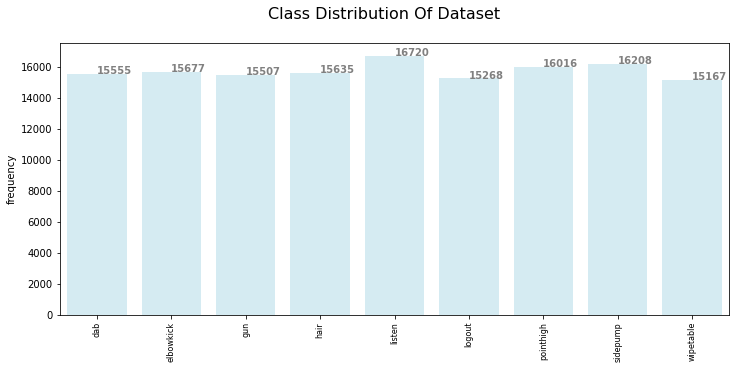

In [4]:
def plot_distribution_of_data(df, title=""):
    activity, counts = np.unique(df.activityName, return_counts=True)
    index = np.arange(len(activity))
    plt.figure(figsize=(12, 5))
    plt.bar(index, counts, align = 'center', alpha=0.5, color='lightblue')
    plt.suptitle(title, fontsize=16)
    plt.xticks(index, activity, rotation=90, fontsize=8)
    plt.xlim([-.5, 8.5])
    plt.ylabel('frequency', fontsize=10)
    for i, v in enumerate(counts):
        plt.text(i, v, str(v), color='grey', fontweight='bold')
    plt.show()

plot_distribution_of_data(df, title='Class Distribution Of Dataset')

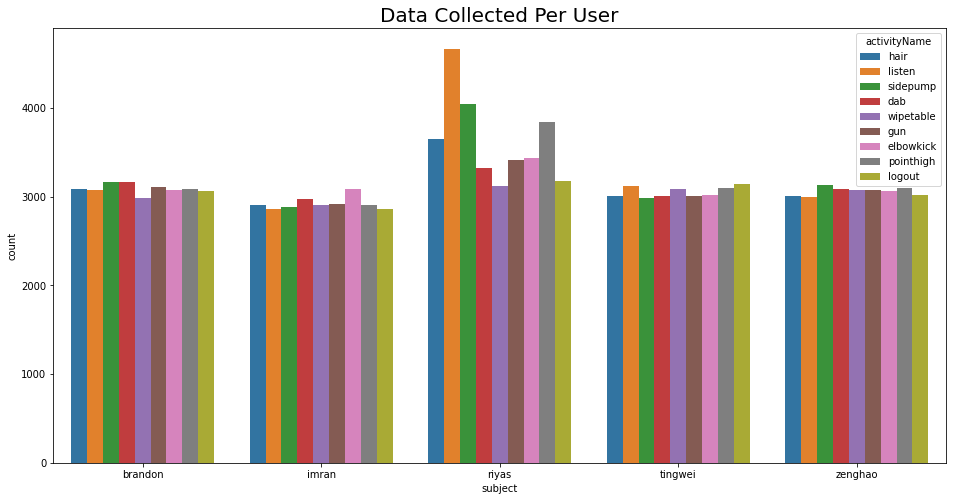

In [5]:
def plot_distribution_of_data_per_user(df, title=""):
    plt.figure(figsize=(16,8))
    plt.title(title, fontsize=20)
    sns.countplot(x='subject',hue='activityName', data=df)
    plt.show()

plot_distribution_of_data_per_user(df, title='Data Collected Per User')

In [6]:
def convert_to_timeseries(features, num_time_steps, num_features):
    data = np.reshape(features, newshape=(num_time_steps, num_features))
    return data.T

num_time_steps = 60
X = list()
y = list()
df_len = len(df)
for idx in range(0, df_len, num_time_steps//2):
    window_df = df[idx:idx+num_time_steps]
    labels = window_df["activity"].unique()
    trials = window_df["trial"].unique()
    subjects = window_df["subject"].unique()
    if len(labels) != 1 or len(trials) != 1 or len(subjects) != 1 or len(window_df) < num_time_steps:
        continue
    assert len(labels) == 1 and len(window_df) == num_time_steps
    features = window_df.drop(columns=["activity", "activityName", "subject", "trial"]).values
    features = convert_to_timeseries(features, num_time_steps=num_time_steps, num_features=9)
    X.append(features)
    y.append(labels)

X = np.array(X)
y = np.array(y)

X.shape, y.shape

((4547, 9, 60), (4547, 1))

In [7]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(15,8))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cmap='Reds'
        print("Normalized Confusion Matrix")
    else:
        cmap='Greens'
        print('Confusion Matrix Without Normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [8]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            上次验证集损失值改善后等待几个epoch
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            如果是True，为每个验证集损失值改善打印一条信息
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            监测数量的最小变化，以符合改进的要求
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''
        Saves model when validation loss decrease.
        验证损失减少时保存模型。
        '''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model, 'finish_model.pkl')                 # 这里会存储迄今最优的模型
        self.val_loss_min = val_loss

def plot_avg_loss_per_epoch(avg_train_losses, avg_valid_losses):
    # visualize the loss as the network trained
    fig = plt.figure(figsize=(10,8))
    plt.plot(range(1,len(avg_train_losses)+1), avg_train_losses, label='Training Loss')
    plt.plot(range(1,len(avg_valid_losses)+1), avg_valid_losses,label='Validation Loss')

    # find position of lowest validation loss
    minposs = avg_train_losses.index(min(avg_train_losses))+1 
    plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.ylim(0, 2) # consistent scale
    plt.xlim(0, len(avg_train_losses)+1) # consistent scale
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_accuracy_per_epoch(train_accuracies, valid_accuracies):
    # visualize the loss as the network trained
    fig = plt.figure(figsize=(10,8))
    plt.plot(range(1,len(train_accuracies)+1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1,len(valid_accuracies)+1), valid_accuracies,label='Valid Accuracy')

    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.ylim(0, 1) # consistent scale
    plt.xlim(0, len(train_accuracies)+1) # consistent scale
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [9]:
class DLTrainer:
    def __init__(self, model, trainloader, validloader, testloader, criterion, optimizer, early_stopping, n_epochs, patience, is_time_series=False):
        self.model = model
        self.trainloader = trainloader
        self.validloader = validloader
        self.testloader = testloader
        
        self.criterion = criterion
        self.optimizer = optimizer
        self.early_stopping = early_stopping
        self.n_epochs = n_epochs
        self.patience = patience
        self.is_time_series = is_time_series

        self.avg_train_losses = []
        self.avg_valid_losses = [] 
        self.train_accuracies = []
        self.valid_accuracies = []

    def train(self):
        self.model.cuda()
        for epoch in range(self.n_epochs):  # loop over the dataset multiple times
            train_correct, train_total, train_loss = self.train_epoch()
            valid_correct, valid_total, valid_loss = self.validate_epoch()

            # calculate average loss over an epoch
            train_accuracy = train_correct / train_total
            valid_accuracy = valid_correct / valid_total

            self.avg_train_losses.append(train_loss)
            self.avg_valid_losses.append(valid_loss)
            self.train_accuracies.append(train_accuracy)
            self.valid_accuracies.append(valid_accuracy)

            log_message = f'[{str(epoch)}/{str(self.n_epochs)}] train_loss: {train_loss:.5f} valid_loss: {valid_loss:.5f} train_accuracy: {train_accuracy:.5f} valid_accuracy: {valid_accuracy:.5f}'
            print(log_message)

            self.early_stopping(valid_loss, self.model)
            
            if self.early_stopping.early_stop:
                break

    def train_epoch(self):
        correct = 0
        total = 0
        losses = []

        self.model.train()
        for data in self.trainloader:
            inputs, labels = data
            inputs = inputs.to("cuda")
            labels = labels.to("cuda")

            self.optimizer.zero_grad()

            outputs = self.model(inputs.float())

            loss = self.criterion(outputs, labels)
            loss.backward()
            self.optimizer.step()

            losses.append(loss.item())

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        return correct, total, np.mean(losses)

    def validate_epoch(self):
        correct = 0
        total = 0
        losses = []

        self.model.eval()
        for data in validloader:
            inputs, labels = data
            inputs = inputs.to("cuda")
            labels = labels.to("cuda")

            outputs = self.model(inputs.float())
            loss = self.criterion(outputs, labels)
            losses.append(loss.item())

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        return correct, total, np.mean(losses)

    def evaluate(self, dataloader):
        correct = 0
        total = 0
        actual = []
        expected = []

        with torch.no_grad():
            for data in dataloader:
                inputs, labels = data
                inputs = inputs.to("cuda")
                labels = labels.to("cuda")
                outputs = self.model(inputs.float())
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                expected += labels.cpu()
                actual += predicted.cpu()

        return correct/total, (expected, actual)

    def show_evaluation(self):
        return self.avg_train_losses, self.avg_valid_losses, self.train_accuracies, self.valid_accuracies


In [10]:
def compute_mean(data):
    return np.mean(data)

def compute_variance(data):
    return np.var(data)

def compute_median_absolute_deviation(data):
    return stats.median_absolute_deviation(data)

def compute_root_mean_square(data):
    def compose(*fs):
        def wrapped(x):
            for f in fs[::-1]:
                x = f(x)
            return x
        return wrapped
    rms = compose(np.sqrt, np.mean, np.square)
    return rms(data)

def compute_interquartile_range(data):
    return stats.iqr(data)

def compute_percentile_75(data):
    return np.percentile(data, 75)

def compute_kurtosis(data):
    return stats.kurtosis(data)

def compute_min_max(data):
    return np.max(data) - np.min(data)

def compute_signal_magnitude_area(data):
    return np.sum(data) / len(data)

def compute_zero_crossing_rate(data):
    return ((data[:-1] * data[1:]) < 0).sum()

def compute_spectral_centroid(data):
    spectrum = np.abs(np.fft.rfft(data))
    normalized_spectrum = spectrum / np.sum(spectrum)  # like a probability mass function
    normalized_frequencies = np.linspace(0, 1, len(spectrum))
    spectral_centroid = np.sum(normalized_frequencies * normalized_spectrum)
    return spectral_centroid

def compute_spectral_entropy(data):
    freqs, power_density = signal.welch(data)
    return stats.entropy(power_density)

def compute_spectral_energy(data):
    freqs, power_density = signal.welch(data)
    return np.sum(np.square(power_density))

def compute_principle_frequency(data):
    freqs, power_density = signal.welch(data)
    return freqs[np.argmax(np.square(power_density))]

In [11]:
feature_names = []
for i in ["yaw", "pitch", "row", "gyro_x", "gyro_y", "gyro_z", "acc_x", "acc_y", "acc_z"]:
        for j in ["_mean", "_var", "_mad", "_rms", "_iqr", "_per75", "_kurtosis", "_min_max", "_sma", "_zcr", "_sc", "_entropy", "_energy", "_pfreq"]:
            feature_names.append(i+j)

n_features = len(feature_names)

def rename_raw_data_headers(X, columns):
    X = pd.DataFrame(X)
    X.columns = columns
    return X

def extract_raw_data_features_per_row(f_n):
    f1_mean = compute_mean(f_n)
    f1_var = compute_variance(f_n)
    f1_mad = compute_median_absolute_deviation(f_n)
    f1_rms = compute_root_mean_square(f_n)
    f1_iqr = compute_interquartile_range(f_n)
    f1_per75 = compute_percentile_75(f_n)
    f1_kurtosis = compute_kurtosis(f_n)
    f1_min_max = compute_min_max(f_n)
    f1_sma = compute_signal_magnitude_area(f_n)
    f1_zcr = compute_zero_crossing_rate(f_n)
    f1_sc = compute_spectral_centroid(f_n)
    f1_entropy = compute_spectral_entropy(f_n)
    f1_energy = compute_spectral_energy(f_n)
    f1_pfreq = compute_principle_frequency(f_n)
    return f1_mean, f1_var, f1_mad, f1_rms, f1_iqr, f1_per75, f1_kurtosis, f1_min_max, f1_sma, f1_zcr, f1_sc, f1_entropy, f1_energy, f1_pfreq

def extract_raw_data_features(X):
    new_features = np.ones((X.shape[0], n_features))
    rows = X.shape[0]
    cols = X.shape[1]

    for row in range(rows):
        features = []
        for col in range(cols):
            f_n = X[row][col]
            feature = extract_raw_data_features_per_row(f_n)
            features.extend(feature)
        new_features[row] = np.array(features)

    return new_features


def prepare_raw_data_dataframe(X, y, random_state=42):
    X = extract_raw_data_features(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)
    X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=random_state)

    return X_train, X_valid, X_test, y_train, y_valid, y_test

X_train, X_valid, X_test, y_train, y_valid, y_test = prepare_raw_data_dataframe(X, y)

In [12]:
scaler = preprocessing.StandardScaler()

def scale_data(data, is_train=False):
    if is_train:
        data = scaler.fit_transform(data)
    else:
        data = scaler.transform(data)
    return data

X_train = scale_data(X_train, is_train=True)
X_valid = scale_data(X_valid)
X_test = scale_data(X_test)
X_train.shape

(4092, 126)

In [13]:
df2 = pd.DataFrame(X_train, columns=feature_names)
df2["activityName"] = y_train
df2["activityName"] = df2["activityName"].replace([0,1,2,3,4,5,6,7,8], activities)
df2

,yaw_mean,yaw_var,yaw_mad,yaw_rms,yaw_iqr,yaw_per75,yaw_kurtosis,yaw_min_max,yaw_sma,yaw_zcr,yaw_sc,yaw_entropy,yaw_energy,yaw_pfreq,pitch_mean,pitch_var,pitch_mad,pitch_rms,pitch_iqr,pitch_per75,pitch_kurtosis,pitch_min_max,pitch_sma,pitch_zcr,pitch_sc,pitch_entropy,pitch_energy,pitch_pfreq,row_mean,row_var,row_mad,row_rms,row_iqr,row_per75,row_kurtosis,row_min_max,row_sma,row_zcr,row_sc,row_entropy,...,acc_x_rms,acc_x_iqr,acc_x_per75,acc_x_kurtosis,acc_x_min_max,acc_x_sma,acc_x_zcr,acc_x_sc,acc_x_entropy,acc_x_energy,acc_x_pfreq,acc_y_mean,acc_y_var,acc_y_mad,acc_y_rms,acc_y_iqr,acc_y_per75,acc_y_kurtosis,acc_y_min_max,acc_y_sma,acc_y_zcr,acc_y_sc,acc_y_entropy,acc_y_energy,acc_y_pfreq,acc_z_mean,acc_z_var,acc_z_mad,acc_z_rms,acc_z_iqr,acc_z_per75,acc_z_kurtosis,acc_z_min_max,acc_z_sma,acc_z_zcr,acc_z_sc,acc_z_entropy,acc_z_energy,acc_z_pfreq,activityName
0,1.168122,-0.891341,-0.873657,-2.218624,-1.092716,0.205390,-0.254039,-1.290498,1.168122,0.077376,0.423553,-0.343105,-0.377676,-0.568067,0.342066,0.072456,1.013108,-0.362370,0.630002,0.528871,-0.389295,0.013831,0.342066,1.015723,0.930669,-0.574390,0.051691,-0.516225,1.224682,-0.966643,-1.228904,-1.820130,-1.183302,0.222350,-0.302731,-1.627132,1.224682,0.702073,0.777093,1.701365,...,-2.195343,-0.792772,0.424413,0.049483,-0.831133,0.999601,-0.384937,-0.055026,-0.293191,-0.285910,0.602747,0.678664,-0.064717,-1.614895,-1.044833,-1.692721,-0.443391,0.919162,-0.439240,0.678664,4.079616,1.862161,2.856514,-0.015806,-0.106541,1.175876,-0.941122,-0.982045,1.020026,-1.028699,0.736234,-0.649662,-1.387913,1.175876,-0.690581,-0.676765,1.907850,-0.313580,-0.021444,logout
1,0.183337,-0.890519,-0.806372,-1.380406,-1.041080,-0.421959,-0.428795,-1.317157,0.183337,-1.069802,-0.874456,0.608583,-0.377884,0.396869,-0.450881,1.483599,2.930487,1.254622,2.567404,0.789944,-0.563166,0.572652,-0.450881,0.222529,-1.013761,-0.593605,1.787155,-0.516225,1.116181,-0.702362,-1.119226,-1.190077,-0.516362,0.520025,-0.311750,-0.942262,1.116181,-0.293554,0.536441,-0.884430,...,-1.289300,0.426346,0.990688,-0.564724,-0.019968,1.120455,0.389860,0.278167,-1.163984,-0.006646,-0.223531,0.739143,-0.063465,-1.394458,-0.965201,-1.419561,-0.219157,-0.328175,-0.473443,0.739143,0.298977,0.913119,2.158909,-0.015805,-1.026304,0.861917,0.279613,0.214124,0.888517,0.458346,1.027687,-0.079848,0.204264,0.861917,-0.690581,-0.307444,-0.412610,0.266992,0.783586,logout
2,-1.753140,-0.894803,-0.835208,0.987317,-1.061616,-1.742847,-0.533288,-1.350190,-1.753140,-1.069802,-1.148589,-0.465482,-0.377807,2.326740,-1.093268,-0.874238,-1.060587,-0.122287,-1.213136,-1.408335,-0.443742,-1.114015,-1.093268,-1.363861,-0.707289,-0.780553,-0.379562,1.925847,0.379215,-0.949804,-1.165646,-1.257855,-1.086125,-0.377247,-0.486221,-1.557397,0.379215,-1.289182,0.121557,-0.097854,...,0.124666,1.400688,0.618440,-1.180221,0.026372,-0.039152,1.939456,0.185747,-1.503330,0.135488,1.429026,-1.363238,-0.050636,-0.672610,-0.046529,-0.423533,-1.526800,-0.527668,-0.301122,-1.363238,-0.457151,-1.286617,-0.823092,-0.015789,1.732983,1.704093,-0.323813,0.370209,1.702362,0.475474,1.682140,-1.361582,-0.746954,1.704093,-0.690581,-0.653149,-1.424252,-0.186392,0.783586,wipetable
3,-0.148686,2.733076,0.820237,1.797622,3.260850,2.381703,-0.338426,1.558003,-0.148686,-0.496213,0.934284,0.837266,1.217116,-0.568067,-1.468824,-0.421085,0.142848,0.864533,-0.189040,-1.286347,-0.242198,-0.314054,-1.468824,-1.363861,-0.804635,-0.509797,-0.276750,-0.516225,0.851903,-0.538182,0.147313,-0.922296,-0.062679,0.616616,-0.901405,-0.649131,0.851903,0.702073,-0.070268,-0.165754,...,0.967095,-0.556357,-1.086576,-0.320760,-0.908439,-1.163837,-1.159735,-1.017925,0.274714,-0.323573,-1.049810,0.136131,-0.038879,-0.775261,-0.337533,-0.889136,-0.191377,1.133999,-0.011465,0.136131,0.677041,0.751584,-0.294234,-0.015798,-1.026304,1.440868,-0.808579,-0.999308,1.338419,-0.892017,1.086744,0.087023,-0.795766,1.440868,-0.690581,-0.949404,0.221574,-0.304537,0.783586,pointhigh
4,-0.127679,0.643175,0.249001,0.5054

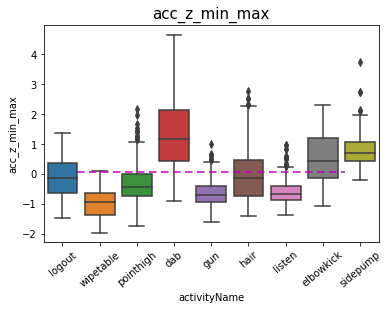

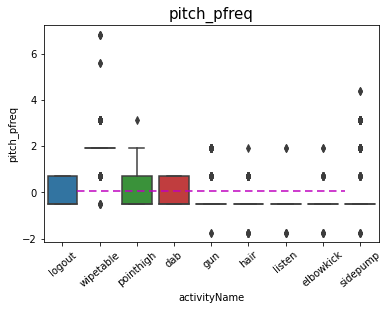

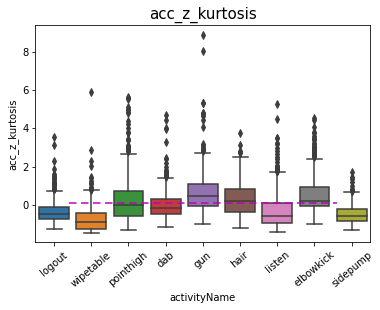

In [14]:
exploratory_features = ["acc_z_min_max", "pitch_pfreq", "acc_z_kurtosis"]

def plot_boxplot_activity_distribution(data, y):
    sns.boxplot(x='activityName', y=y, data=data)
    plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
    plt.title(feature, fontsize=15)
    plt.xticks(rotation = 40)
    plt.show()

for feature in exploratory_features:
    plot_boxplot_activity_distribution(df2, feature)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 4092 samples in 0.044s...
[t-SNE] Computed neighbors for 4092 samples in 3.817s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4092
[t-SNE] Computed conditional probabilities for sample 2000 / 4092
[t-SNE] Computed conditional probabilities for sample 3000 / 4092
[t-SNE] Computed conditional probabilities for sample 4000 / 4092
[t-SNE] Computed conditional probabilities for sample 4092 / 4092
[t-SNE] Mean sigma: 0.969378
[t-SNE] Computed conditional probabilities in 0.025s
[t-SNE] Iteration 50: error = 116.5577850, gradient norm = 0.0918427 (50 iterations in 3.004s)
[t-SNE] Iteration 100: error = 97.0122986, gradient norm = 0.0645951 (50 iterations in 1.036s)
[t-SNE] Iteration 150: error = 90.6062164, gradient norm = 0.0552995 (50 iterations in 0.904s)
[t-SNE] Iteration 200: error = 86.8592224, gradient norm = 0.0531425 (50 iterations in 0.874s)
[t-SNE] Iteration 250: error = 84.2488403, gradient norm = 0.0425343

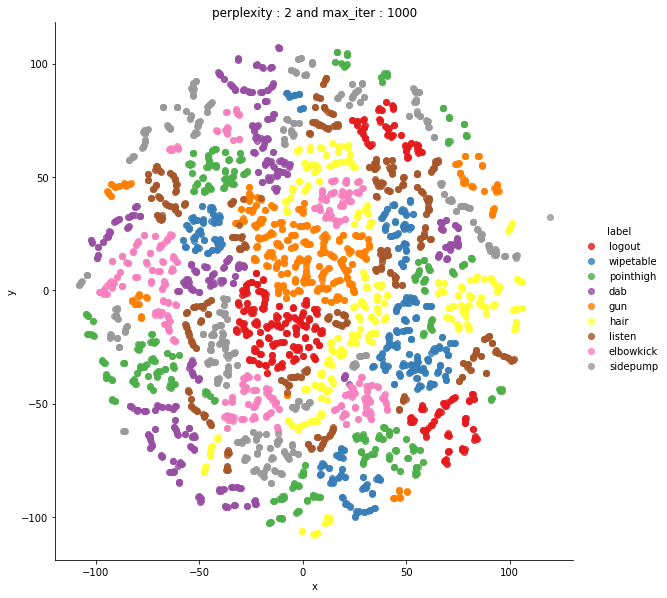

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 4092 samples in 0.055s...
[t-SNE] Computed neighbors for 4092 samples in 4.187s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4092
[t-SNE] Computed conditional probabilities for sample 2000 / 4092
[t-SNE] Computed conditional probabilities for sample 3000 / 4092
[t-SNE] Computed conditional probabilities for sample 4000 / 4092
[t-SNE] Computed conditional probabilities for sample 4092 / 4092
[t-SNE] Mean sigma: 1.680627
[t-SNE] Computed conditional probabilities in 0.035s
[t-SNE] Iteration 50: error = 103.5372009, gradient norm = 0.0839593 (50 iterations in 1.836s)
[t-SNE] Iteration 100: error = 84.9586182, gradient norm = 0.0408996 (50 iterations in 1.036s)
[t-SNE] Iteration 150: error = 79.3565979, gradient norm = 0.0304166 (50 iterations in 0.856s)
[t-SNE] Iteration 200: error = 76.2626343, gradient norm = 0.0235510 (50 iterations in 0.843s)
[t-SNE] Iteration 250: error = 74.2415695, gradient norm = 0.018874

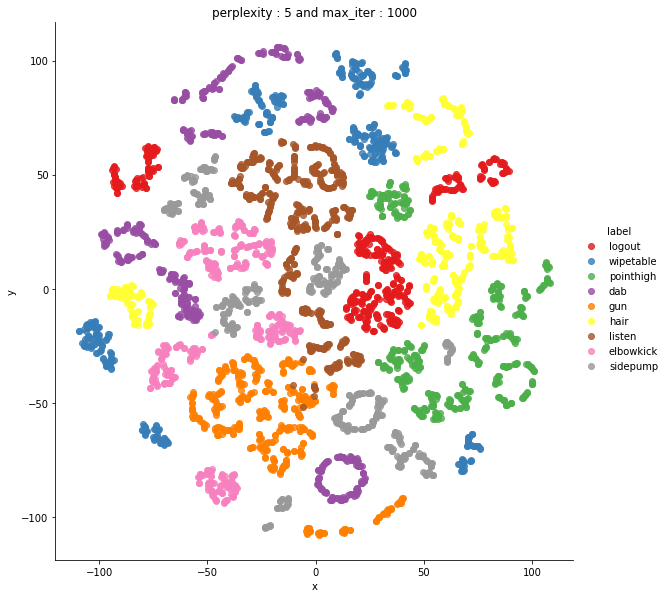

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4092 samples in 0.073s...
[t-SNE] Computed neighbors for 4092 samples in 4.315s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4092
[t-SNE] Computed conditional probabilities for sample 2000 / 4092
[t-SNE] Computed conditional probabilities for sample 3000 / 4092
[t-SNE] Computed conditional probabilities for sample 4000 / 4092
[t-SNE] Computed conditional probabilities for sample 4092 / 4092
[t-SNE] Mean sigma: 2.158291
[t-SNE] Computed conditional probabilities in 0.067s
[t-SNE] Iteration 50: error = 92.6581268, gradient norm = 0.0767533 (50 iterations in 1.479s)
[t-SNE] Iteration 100: error = 76.2323303, gradient norm = 0.0281108 (50 iterations in 0.926s)
[t-SNE] Iteration 150: error = 71.5587540, gradient norm = 0.0217121 (50 iterations in 0.887s)
[t-SNE] Iteration 200: error = 69.0392303, gradient norm = 0.0184507 (50 iterations in 0.866s)
[t-SNE] Iteration 250: error = 67.4215851, gradient norm = 0.0139216

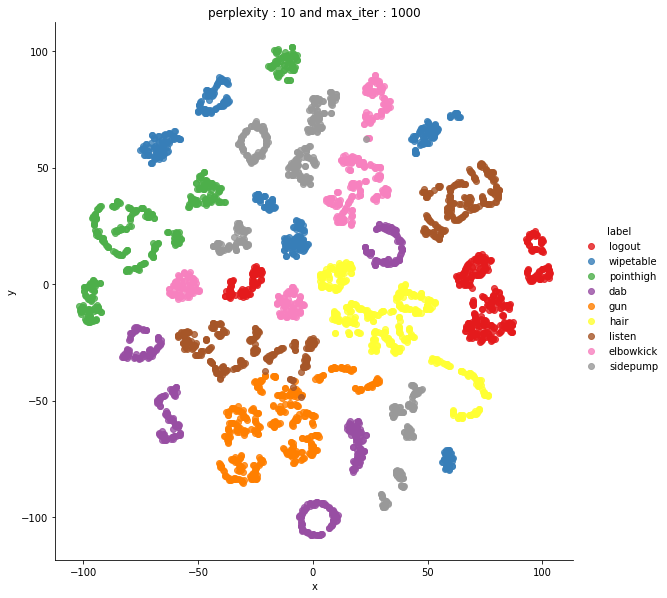

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 4092 samples in 0.067s...
[t-SNE] Computed neighbors for 4092 samples in 4.524s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4092
[t-SNE] Computed conditional probabilities for sample 2000 / 4092
[t-SNE] Computed conditional probabilities for sample 3000 / 4092
[t-SNE] Computed conditional probabilities for sample 4000 / 4092
[t-SNE] Computed conditional probabilities for sample 4092 / 4092
[t-SNE] Mean sigma: 2.647798
[t-SNE] Computed conditional probabilities in 0.133s
[t-SNE] Iteration 50: error = 84.1741180, gradient norm = 0.0491528 (50 iterations in 1.686s)
[t-SNE] Iteration 100: error = 69.0693970, gradient norm = 0.0245340 (50 iterations in 1.033s)
[t-SNE] Iteration 150: error = 65.1144104, gradient norm = 0.0136393 (50 iterations in 1.003s)
[t-SNE] Iteration 200: error = 63.1291199, gradient norm = 0.0106144 (50 iterations in 0.984s)
[t-SNE] Iteration 250: error = 61.9040756, gradient norm = 0.0103615

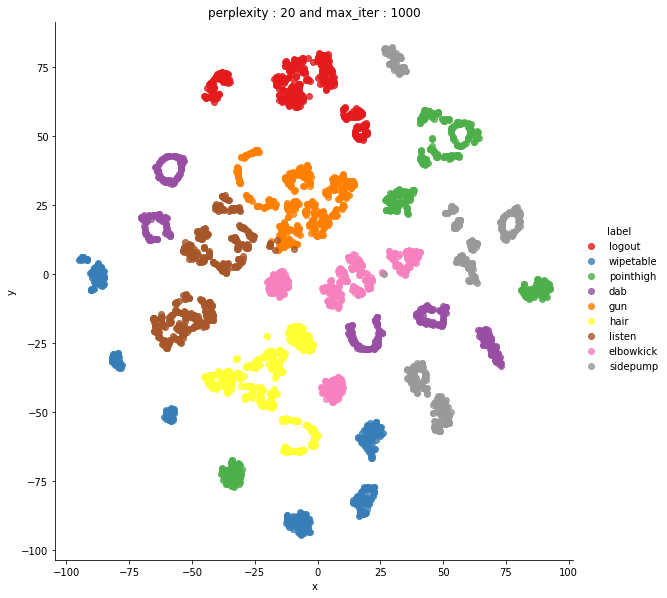

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4092 samples in 0.065s...
[t-SNE] Computed neighbors for 4092 samples in 4.739s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4092
[t-SNE] Computed conditional probabilities for sample 2000 / 4092
[t-SNE] Computed conditional probabilities for sample 3000 / 4092
[t-SNE] Computed conditional probabilities for sample 4000 / 4092
[t-SNE] Computed conditional probabilities for sample 4092 / 4092
[t-SNE] Mean sigma: 3.475876
[t-SNE] Computed conditional probabilities in 0.334s
[t-SNE] Iteration 50: error = 75.4398270, gradient norm = 0.0379805 (50 iterations in 1.873s)
[t-SNE] Iteration 100: error = 63.5317764, gradient norm = 0.0118594 (50 iterations in 1.334s)
[t-SNE] Iteration 150: error = 61.2295380, gradient norm = 0.0068512 (50 iterations in 1.345s)
[t-SNE] Iteration 200: error = 60.2120590, gradient norm = 0.0052928 (50 iterations in 1.315s)
[t-SNE] Iteration 250: error = 59.6290894, gradient norm = 0.003936

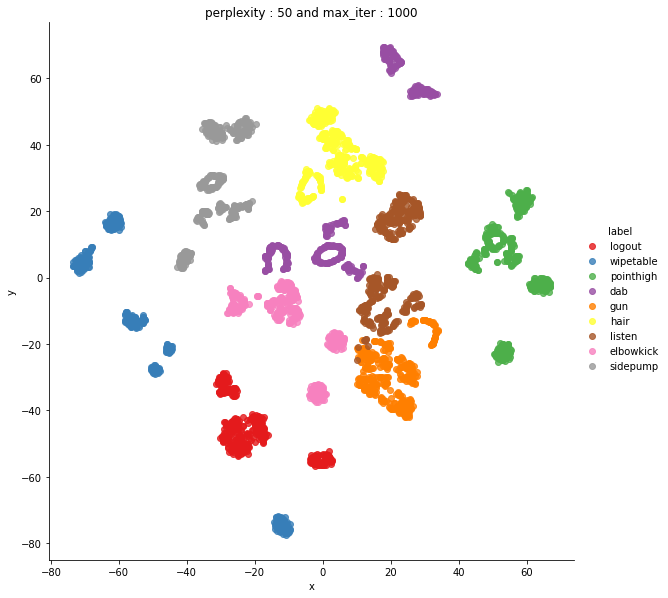

In [15]:
perplexities = [2,5,10,20,50]

def plot_tsne(X_data, y_data, perplexity, n_iter=1000, img_name_prefix='t-sne'):
    # perform t-sne
    X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
    
    # prepare the data for seaborn         
    df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
    
    # draw the plot in appropriate place in the grid
    sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                palette="Set1")
    plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
    img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
    plt.show()

for perplexity in perplexities:
    X_pre_tsne = df2.drop(columns=['activityName'], axis=1)
    y_pre_tsne = df2['activityName']
    plot_tsne(X_data=X_pre_tsne, y_data=y_pre_tsne, perplexity=perplexity)

In [16]:
class DNNDataset(object):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __getitem__(self, idx):
        data = self.X[idx]
        target = self.y[idx][0] 
        return data, target

    def __len__(self):
        return len(self.X)

def prepare_dnn_dataloader(X_train, X_valid, X_test, y_train, y_valid, y_test):
    traindataset = DNNDataset(X_train, y_train)

    trainloader = torch.utils.data.DataLoader(
        traindataset, 
        batch_size=100, 
        shuffle=True, 
        num_workers=4,
    )

    validdataset = DNNDataset(X_valid, y_valid)

    validloader = torch.utils.data.DataLoader(
        validdataset, 
        batch_size=100, 
        shuffle=True, 
        num_workers=4,
    )

    testdataset = DNNDataset(X_test, y_test)

    testloader = torch.utils.data.DataLoader(
        testdataset, 
        batch_size=100, 
        shuffle=True, 
        num_workers=4,
    )

    return trainloader, validloader, testloader

In [17]:
class DNN(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(126, 64)
        self.dp1 = nn.Dropout(0.1)

        self.fc2 = nn.Linear(64, 16)
        self.dp2 = nn.Dropout(0.1)
        
        self.fc3 = nn.Linear(16,n_labels)

    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)

        x = self.fc2(x)
        x = self.dp2(x)

        x = self.fc3(x)
        return x

trainloader, validloader, testloader = prepare_dnn_dataloader(X_train, X_valid, X_test, y_train, y_valid, y_test)
inputs, labels = next(iter(trainloader))
model = DNN()
outputs = model(inputs.float())
labels[:1], outputs[:1]

(tensor([2]),
 tensor([[ 0.1044, -0.2078, -0.2055, -0.1354,  0.2416, -0.1437, -0.0296, -0.5676,
           0.1957]], grad_fn=<SliceBackward>))

In [18]:
print(model)

DNN(
  (fc1): Linear(in_features=126, out_features=64, bias=True)
  (dp1): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (dp2): Dropout(p=0.1, inplace=False)
  (fc3): Linear(in_features=16, out_features=9, bias=True)
)


In [19]:
patience = 10
n_epochs = 1000

model = DNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
early_stopping = EarlyStopping(patience=patience)
trainloader, validloader, testloader = prepare_dnn_dataloader(X_train, X_valid, X_test, y_train, y_valid, y_test)

trainer = DLTrainer(model, trainloader, validloader, testloader, criterion, optimizer, early_stopping, n_epochs, patience)
trainer.train()

[0/1000] train_loss: 2.06066 valid_loss: 1.91633 train_accuracy: 0.26906 valid_accuracy: 0.43612
[1/1000] train_loss: 1.76531 valid_loss: 1.60000 train_accuracy: 0.55156 valid_accuracy: 0.71366
[2/1000] train_loss: 1.44090 valid_loss: 1.25917 train_accuracy: 0.72067 valid_accuracy: 0.80176
[3/1000] train_loss: 1.13860 valid_loss: 0.96145 train_accuracy: 0.78910 valid_accuracy: 0.84141
[4/1000] train_loss: 0.90012 valid_loss: 0.76094 train_accuracy: 0.83529 valid_accuracy: 0.85022
[5/1000] train_loss: 0.72151 valid_loss: 0.58931 train_accuracy: 0.86608 valid_accuracy: 0.92511
[6/1000] train_loss: 0.59409 valid_loss: 0.53943 train_accuracy: 0.88587 valid_accuracy: 0.93833
[7/1000] train_loss: 0.50101 valid_loss: 0.40281 train_accuracy: 0.90274 valid_accuracy: 0.95595
[8/1000] train_loss: 0.42931 valid_loss: 0.35868 train_accuracy: 0.91373 valid_accuracy: 0.95595
[9/1000] train_loss: 0.37894 valid_loss: 0.30346 train_accuracy: 0.92620 valid_accuracy: 0.96476
[10/1000] train_loss: 0.33250 

In [20]:
dnn_valid_accuracy, dnn_valid_prediction = trainer.evaluate(validloader)
dnn_test_accuracy, dnn_test_prediction = trainer.evaluate(testloader)
print(dnn_valid_accuracy, dnn_test_accuracy)

1.0 1.0


Confusion Matrix Without Normalization


<Figure size 1080x576 with 0 Axes>

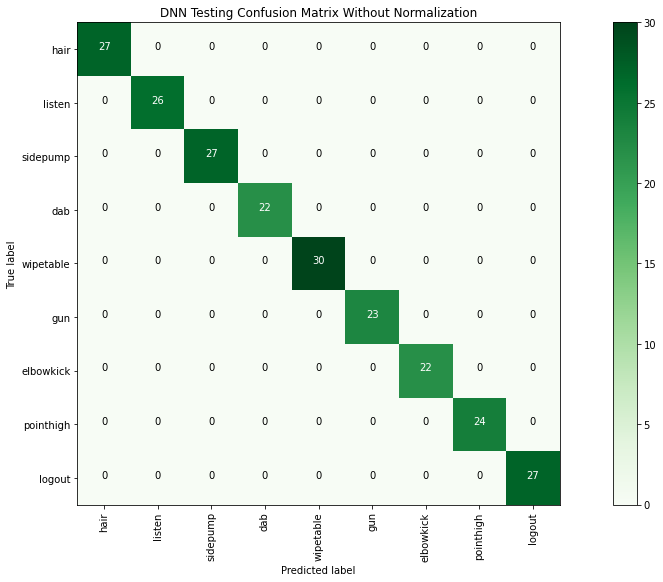

Normalized Confusion Matrix


<Figure size 1080x576 with 0 Axes>

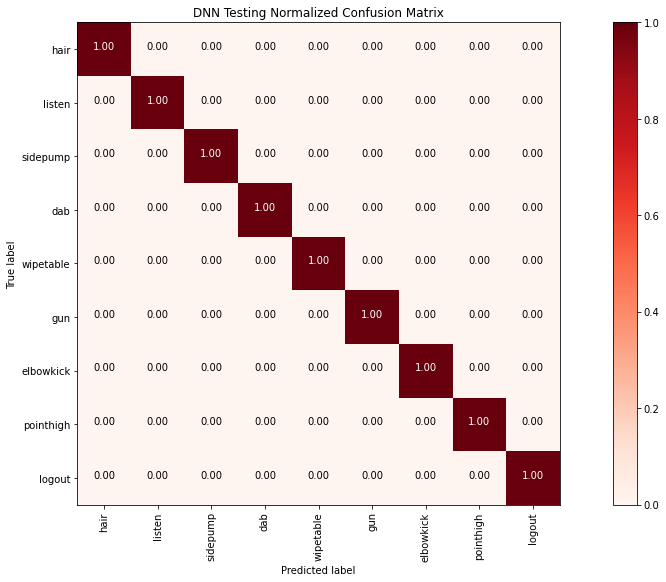

In [21]:
cnf_matrix = confusion_matrix(*dnn_test_prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,8))
plot_confusion_matrix(cnf_matrix, classes=activities, title='DNN Testing Confusion Matrix Without Normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(15,8))
plot_confusion_matrix(cnf_matrix, classes=activities, normalize=True, title='DNN Testing Normalized Confusion Matrix')

plt.show()

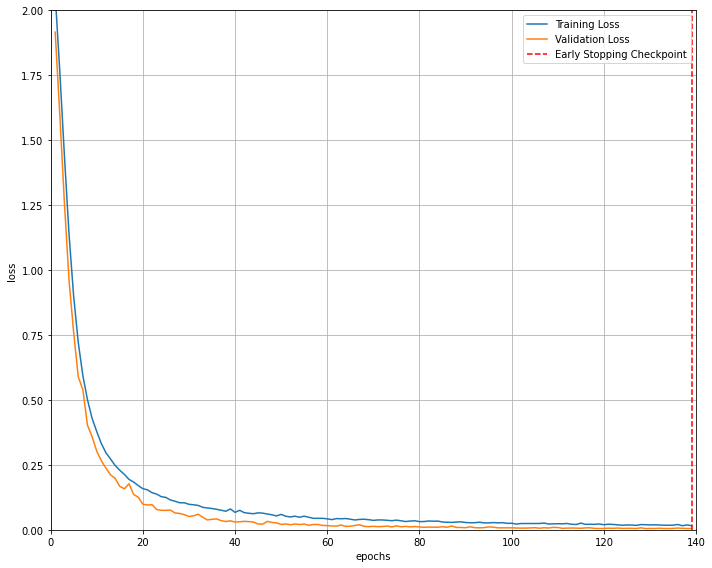

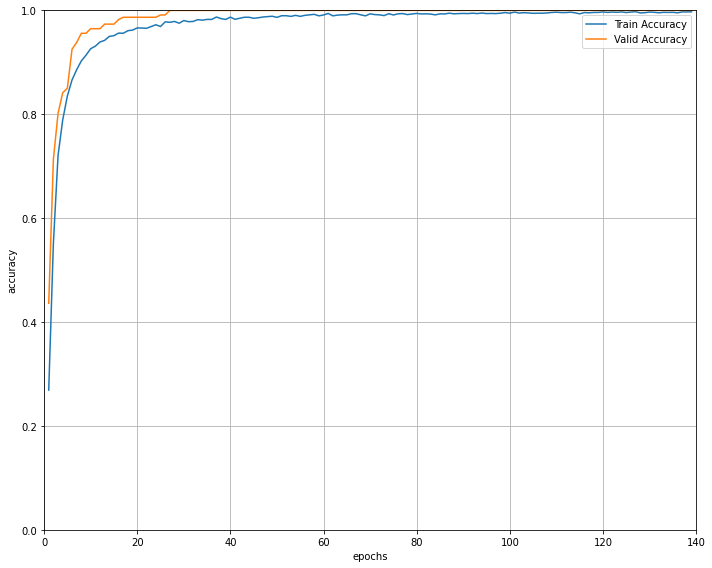

In [22]:
avg_train_losses, avg_valid_losses, train_accuracies, valid_accuracies = trainer.show_evaluation()
plot_avg_loss_per_epoch(avg_train_losses, avg_valid_losses)
plot_accuracy_per_epoch(train_accuracies, valid_accuracies)

In [23]:
torch.save(model.state_dict(), "dnn_model.pth")
dump(scaler, 'dnn_std_scaler.bin', compress=True)

['dnn_std_scaler.bin']

In [24]:
dfs = []

ids = [3,]
user = "brandon"
load_data("hair", 0, ids, user)
load_data("listen", 1, ids, user)
load_data("sidepump", 2, ids, user)
load_data("dab", 3, ids, user)
load_data("wipetable", 4, ids, user)
load_data("gun", 5, ids, user)
load_data("elbowkick", 6, ids, user)
load_data("pointhigh", 7, ids, user)
load_data("logout", 8, ids, user)

user = "imran"
load_data("hair", 0, ids, user)
load_data("listen", 1, ids, user)
load_data("sidepump", 2, ids, user)
load_data("dab", 3, ids, user)
load_data("wipetable", 4, ids, user)
load_data("gun", 5, ids, user)
load_data("elbowkick", 6, ids, user)
load_data("pointhigh", 7, ids, user)
load_data("logout", 8, ids, user)

user = "riyas"
load_data("hair", 0, ids, user)
load_data("listen", 1, ids, user)
load_data("sidepump", 2, ids, user)
load_data("dab", 3, ids, user)
load_data("wipetable", 4, ids, user)
load_data("gun", 5, ids, user)
load_data("elbowkick", 6, ids, user)
load_data("pointhigh", 7, ids, user)
load_data("logout", 8, ids, user)

user = "tingwei"
load_data("hair", 0, ids, user)
load_data("listen", 1, ids, user)
load_data("sidepump", 2, ids, user)
load_data("dab", 3, ids, user)
load_data("wipetable", 4, ids, user)
load_data("gun", 5, ids, user)
load_data("elbowkick", 6, ids, user)
load_data("pointhigh", 7, ids, user)
load_data("logout", 8, ids, user)

user = "zenghao"
load_data("hair", 0, ids, user)
load_data("listen", 1, ids, user)
load_data("sidepump", 2, ids, user)
load_data("dab", 3, ids, user)
load_data("wipetable", 4, ids, user)
load_data("gun", 5, ids, user)
load_data("elbowkick", 6, ids, user)
load_data("pointhigh", 7, ids, user)
load_data("logout", 8, ids, user)

df = pd.concat(dfs)
df.shape

(70106, 13)

In [25]:
X = list()
y = list()
df_len = len(df)
for idx in range(0, df_len, num_time_steps//2):
    window_df = df[idx:idx+num_time_steps]
    labels = window_df["activity"].unique()
    trials = window_df["trial"].unique()
    subjects = window_df["subject"].unique()
    if len(labels) != 1 or len(trials) != 1 or len(subjects) != 1 or len(window_df) < num_time_steps:
        continue
    assert len(labels) == 1 and len(window_df) == num_time_steps
    features = window_df.drop(columns=["activity", "activityName", "subject", "trial"]).values
    features = convert_to_timeseries(features, num_time_steps=num_time_steps, num_features=9)
    X.append(features)
    y.append(labels)

X = np.array(X)
y = np.array(y)
X = extract_raw_data_features(X)
X = scale_data(X)
X.shape, y.shape

((2249, 126), (2249, 1))

In [26]:
dataset = DNNDataset(X, y)

dataloader = torch.utils.data.DataLoader(
    dataset, 
    batch_size=1, 
    shuffle=True, 
    num_workers=4,
)

In [27]:
dnn_test_accuracy, dnn_test_prediction = trainer.evaluate(dataloader)
dnn_test_accuracy

0.9951089373054691

Confusion Matrix Without Normalization


<Figure size 1080x576 with 0 Axes>

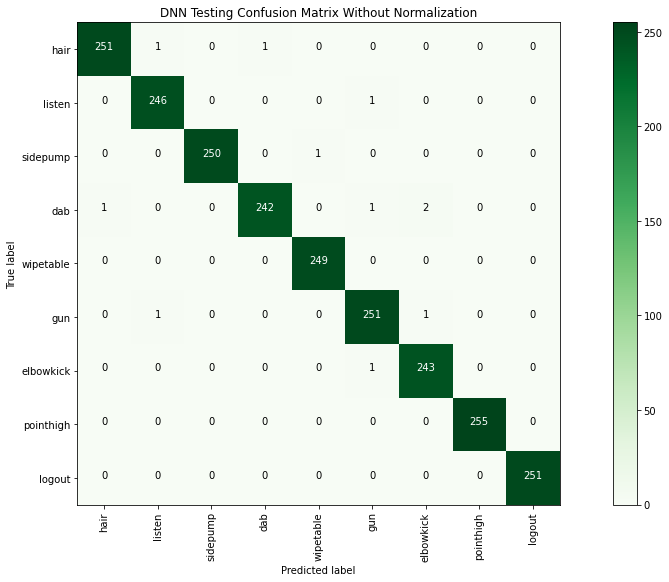

Normalized Confusion Matrix


<Figure size 1080x576 with 0 Axes>

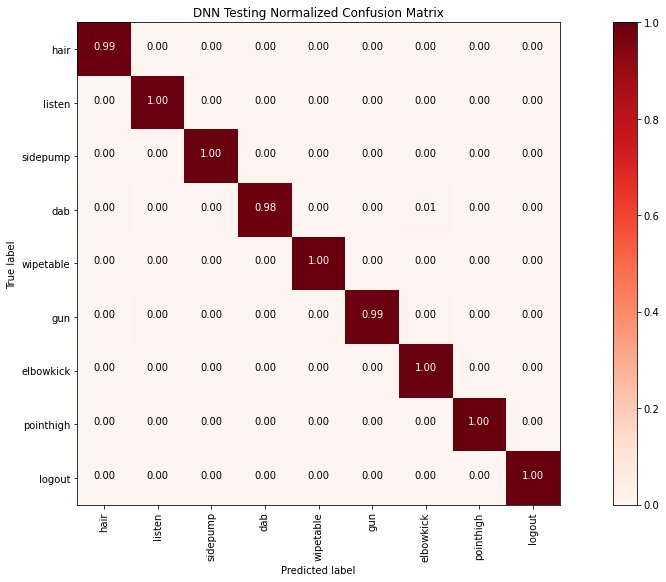

In [28]:
cnf_matrix = confusion_matrix(*dnn_test_prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,8))
plot_confusion_matrix(cnf_matrix, classes=activities, title='DNN Testing Confusion Matrix Without Normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(15,8))
plot_confusion_matrix(cnf_matrix, classes=activities, normalize=True, title='DNN Testing Normalized Confusion Matrix')

plt.show()